In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
iris=pd.read_csv('IRIS.csv')

In [12]:
x = iris.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
iris.info()
iris[45:55]
null=iris.isnull().sum()
print(null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [14]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]
print(iris_setosa)
print(iris_virginica)
print(iris_versicolor)

    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

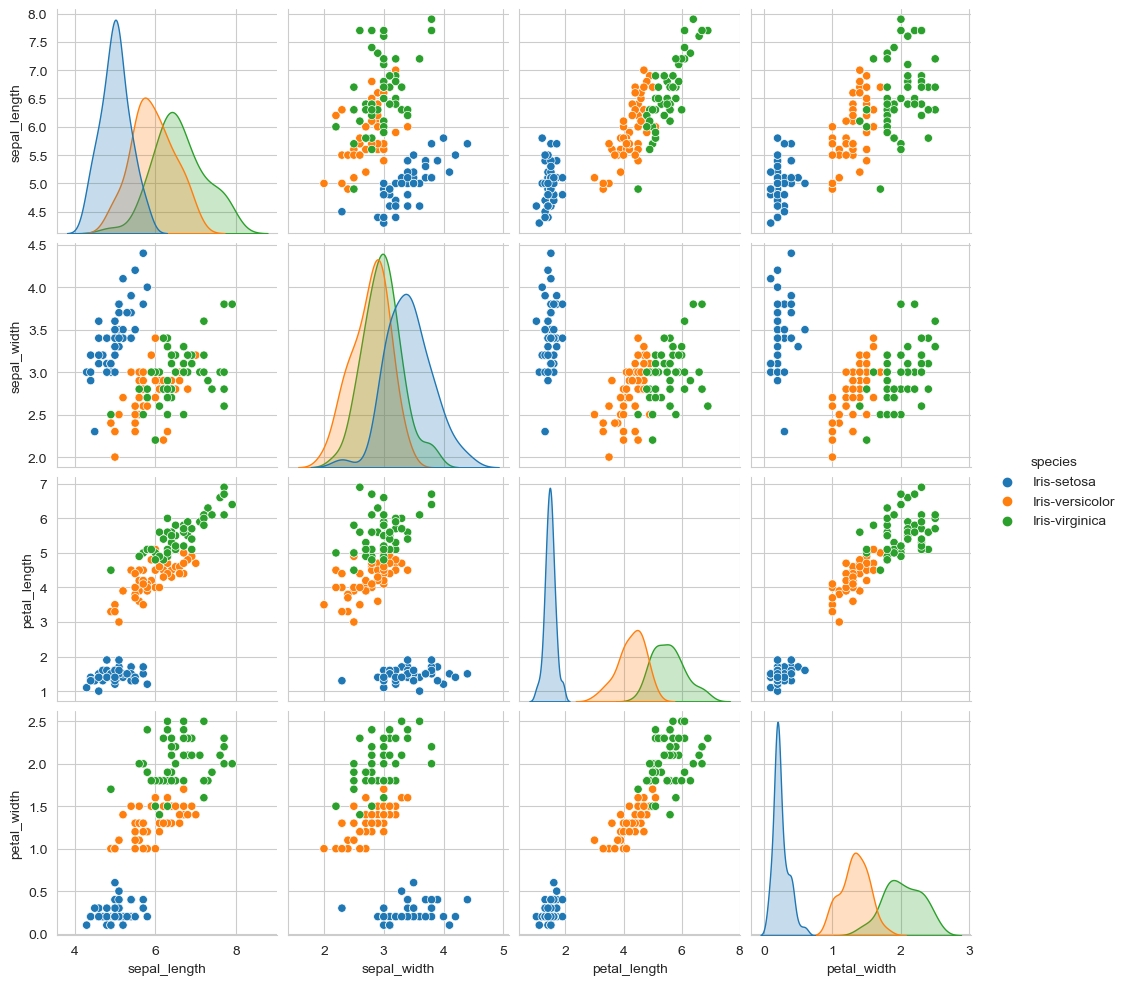

In [16]:
sns.set_style('whitegrid')
sns.pairplot(iris, hue = 'species')
plt.show()

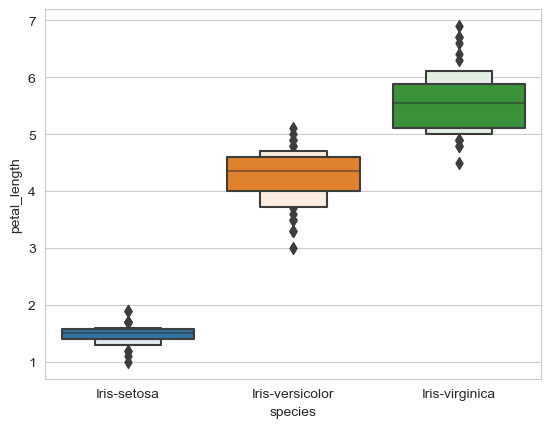

In [17]:
sns.boxenplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

In [18]:
a = []

cls = range(1,10) #cls=cluster range

for k in cls:
    kmeanscluster = KMeans(k)
    kmeanscluster.fit(x)
    a.append(kmeanscluster.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
a

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.34540931571816,
 46.535582051282056,
 38.93873974358974,
 34.65550213675214,
 29.905374299825105,
 27.993390786749483]

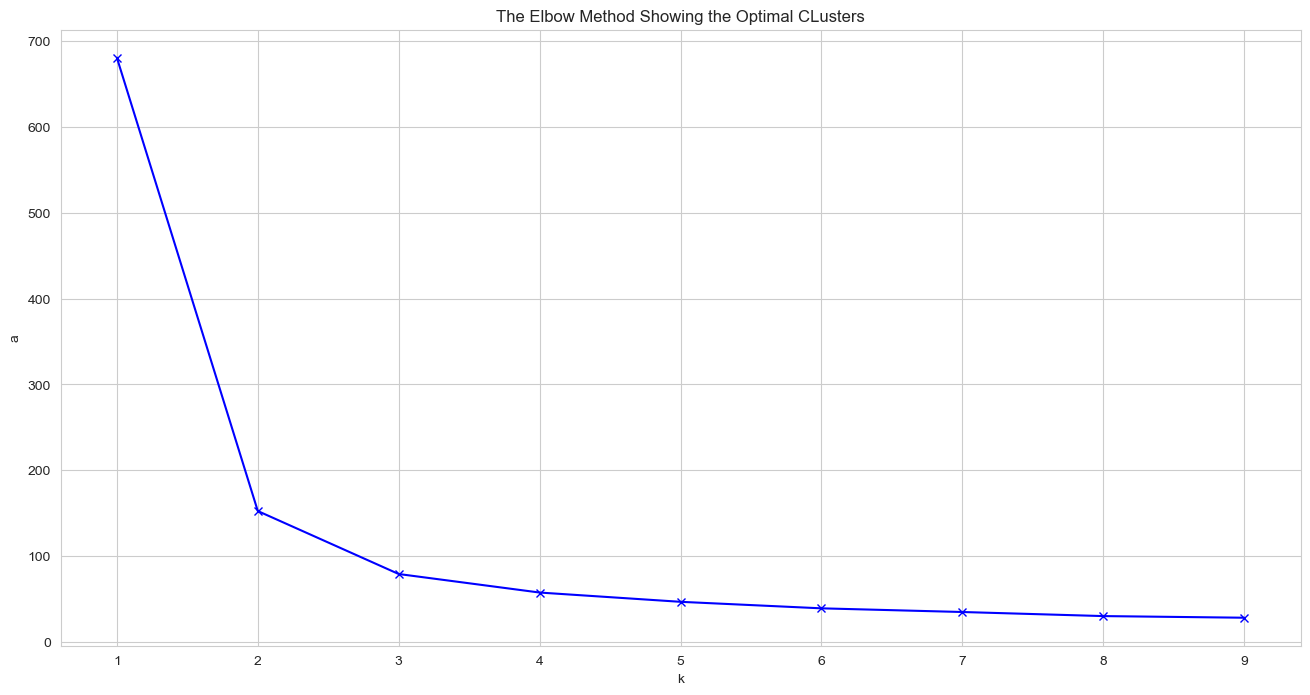

In [20]:
#select the optimal cluster number using elbow method
plt.figure(figsize = (16,8))
plt.plot(cls, a, 'bx-')
plt.xlabel('k')
plt.ylabel('a')
plt.title('The Elbow Method Showing the Optimal CLusters')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=2)
kmeans
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [22]:
cluster_labels = kmeans.labels_


In [23]:
p=x[y_kmeans==0,0]
q=x[y_kmeans==1,0]
r=x[y_kmeans==2,0]
print('values of the cluster 0:',p)
print('values of the cluster 1:',q)
print('values of the cluster 2:',r)

values of the cluster 0: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
values of the cluster 1: [7.  6.4 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2
 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3
 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 5.8 4.9 5.7 5.8 6.  5.6
 6.3 6.2 6.1 6.3 6.  5.8 6.3 5.9]
values of the cluster 2: [6.9 6.7 6.3 7.1 6.3 6.5 7.6 7.3 6.7 7.2 6.5 6.4 6.8 6.4 6.5 7.7 7.7 6.9
 7.7 6.7 7.2 6.4 7.2 7.4 7.9 6.4 6.1 7.7 6.3 6.4 6.9 6.7 6.9 6.8 6.7 6.7
 6.5 6.2]


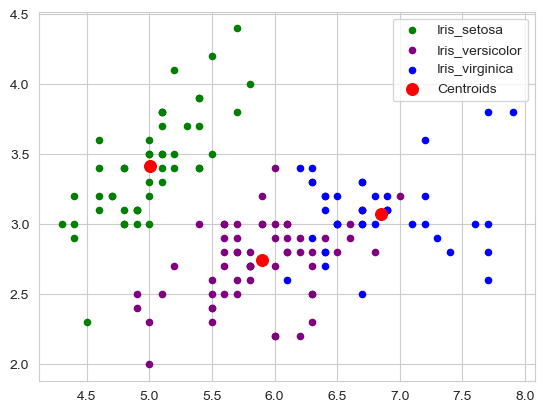

In [24]:
#visualising the cluster
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=20,c="green",label='Iris_setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=20,c="purple",label='Iris_versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=20,c="blue",label='Iris_virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'red',label='Centroids')
plt.legend()
plt.show()

In [25]:
x = iris.iloc[:,[0,1,2,3]].values

In [26]:
y = iris.iloc[:,4].values

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [35]:
import random
random.seed(192258)

kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x_test)

from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,y_pred)

print('Accuracy for KMeans Clustering: ', accuracy)

Accuracy for KMeans Clustering:  0.23333333333333334
